## THE STUDENT PERFORMANCE INDICATOR

### Life cycle of Machine Learning

- Problems Statement
- Data Collection
- EDA
- Data Preprocessing
- Model training
- Choose best model

## Problem Statement
- The problem statement is how the student performance(test score) is affected by other variables like gender, parental level of education, test preparation course

## Data collection

In [2]:
#import data and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv('stud_performance.csv')

In [5]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
data.shape

(1000, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
data.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [12]:
data.race_ethnicity.value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [13]:
data.parental_level_of_education.value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [16]:
data.lunch.value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [18]:
data.test_preparation_course.value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [19]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## Finding missing values

In [20]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## finding duplicate values

In [23]:
data.duplicated().sum()

0

In [24]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Explore the data

In [28]:
print("Gender values :",end="")
print(data.gender.unique())
print()
print("race_ethnicity values :",end="")
print(data.race_ethnicity.unique())
print()
print("parental_level_of_education values :",end="")
print(data.parental_level_of_education.unique())
print()
print("Lunch  values :",end="")
print(data.lunch.unique())
print()
print("test_preparation_course values :",end="")
print(data.test_preparation_course.unique())

Gender values :['female' 'male']

race_ethnicity values :['group B' 'group C' 'group A' 'group D' 'group E']

parental_level_of_education values :["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch   values :['standard' 'free/reduced']

test_preparation_course values :['none' 'completed']


In [34]:
numerical_features=[features for features in data.columns if data[features].dtype!='O']
categorical_features=[features for features in data.columns if data[features].dtype=='O']


In [38]:
print("Numerical Features->",numerical_features)
print("Categorical  Features->",categorical_features)

Numerical Features-> ['math_score', 'reading_score', 'writing_score']
Categorical  Features-> ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Adding new columns

In [42]:
data["Total_score"]=data["math_score"]+data["reading_score"]+data["writing_score"]

In [43]:
data["Average"]=data["Total_score"]/3

In [46]:
data.drop("Toal_score",axis='columns',inplace=True)

In [47]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [50]:
data[data["math_score"]==100]['Average'].count()

7

In [52]:
mathscore_full=data[data["math_score"]==100]['Average'].count()
writingscore_full=data[data["writing_score"]==100]['Average'].count()
readingscore_full=data[data["reading_score"]==100]['Average'].count()

In [56]:
print(mathscore_full,"have full score in maths")
print(writingscore_full,"have full score in writing")
print(readingscore_full,"got full score in reading")

7 have full score in maths
14 have full score in writing
17 got full score in reading


## visualization

<Axes: xlabel='Average', ylabel='Count'>

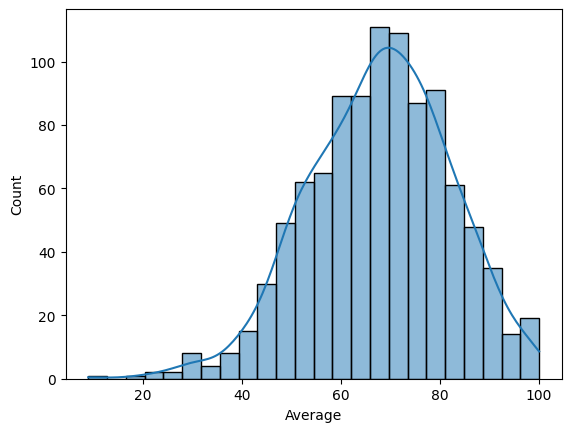

In [58]:
sns.histplot(data=data,x='Average',kde=True)

<Axes: xlabel='Average', ylabel='Count'>

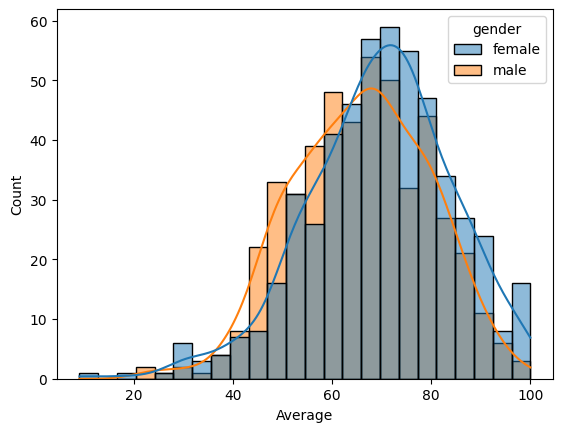

In [59]:
sns.histplot(data=data,x='Average',kde=True,hue="gender")

<Axes: xlabel='Average', ylabel='Count'>

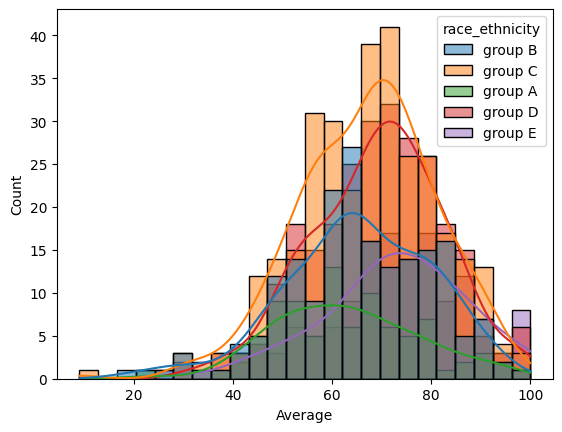

In [60]:
sns.histplot(data=data,x='Average',kde=True,hue="race_ethnicity")

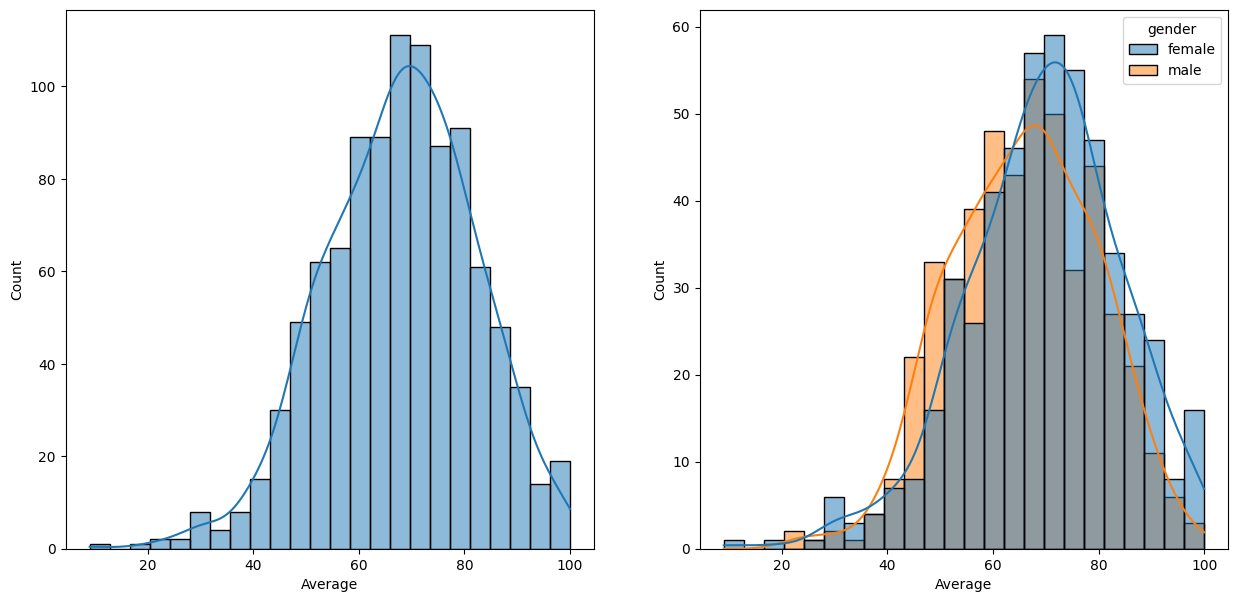

In [65]:
fig,ax=plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x='Average',kde=True)
plt.subplot(122)
sns.histplot(data=data,x='Average',kde=True,hue="gender")
plt.show()

Female perform good then male students

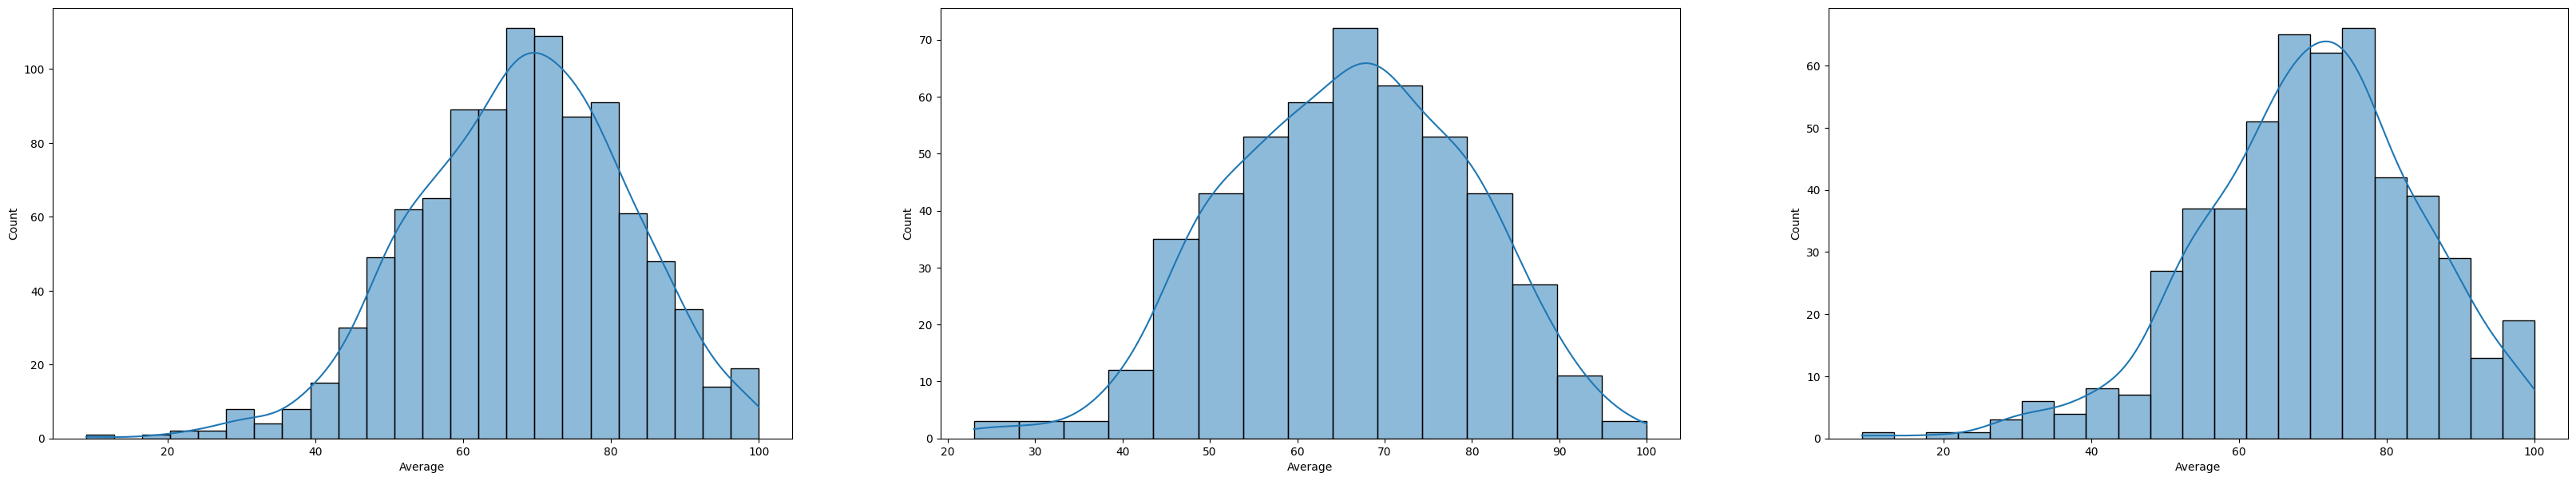

In [71]:
fig,ax=plt.subplots(1,3, figsize=(55,7))
plt.subplot(141)
sns.histplot(data=data,x='Average',kde=True)
plt.subplot(142)
sns.histplot(data=data[data["gender"]=='male'],x='Average',kde=True)
plt.subplot(143)
sns.histplot(data=data[data['gender']=='female'],x='Average',kde=True,)
plt.show()

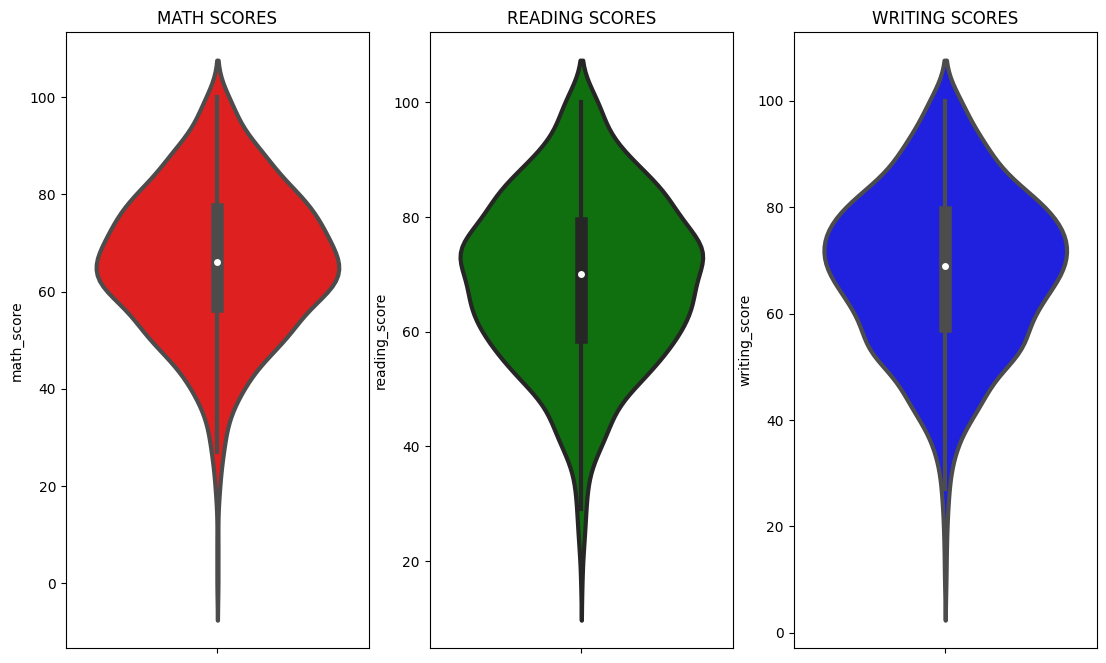

In [72]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=data,color='blue',linewidth=3)
plt.show()

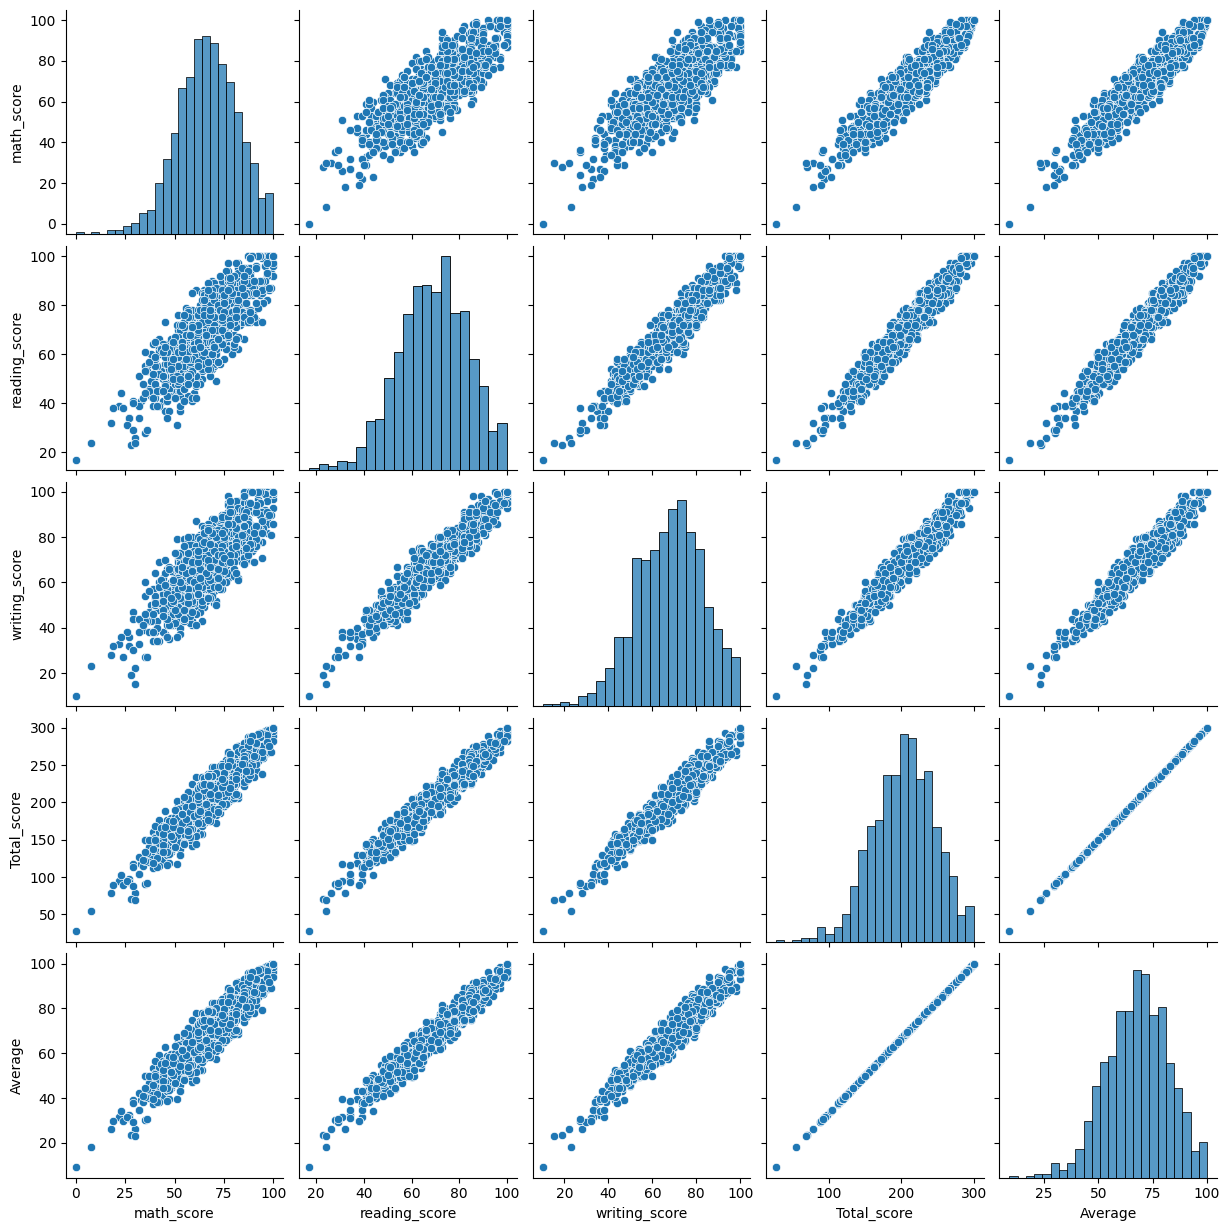

In [73]:
sns.pairplot(data)

## Model Training

### Import libraries for model training 

In [76]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

Divide the independent and dependent features

In [78]:
x=data.drop(["Total_score","Average"],axis='columns')
y=data.Total_score

In [79]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [80]:
y

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: Total_score, Length: 1000, dtype: int64

In [81]:
x.shape,y.shape

((1000, 8), (1000,))

### convert the categorical features and normalize the values

In [84]:
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

#### use pipeline and column transformer to convert the feature values

In [85]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [86]:
numerical_transformer=StandardScaler()
one_hot_transformer=OneHotEncoder()

pipeline=ColumnTransformer(
        [
            ("OneHotEncoder",one_hot_transformer,cat_features),
            ("standardsclaer",numerical_transformer,numerical_features)
        ]
    
)

In [87]:
x=pipeline.fit_transform(x)

In [89]:
x.shape

(1000, 20)

In [91]:
x[0]

array([1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.39002351, 0.19399858, 0.39149181])

In [104]:
def evalution(actual,prediction):
    mse=mean_squared_error(actual,prediction)
    mae=mean_absolute_error(actual,prediction)
    rms=np.sqrt(mean_squared_error(actual,prediction))
    r2=r2_score(actual,prediction)
    
    return mse,mae,rms,r2

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [96]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 20), (200, 20), (800,), (200,))

In [98]:
models={
    "linearRegressor":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "KNN":KNeighborsRegressor(),
    "DecisionTree":DecisionTreeRegressor(),
    "SVR":SVR(),
    "RandomForest":RandomForestRegressor(),
    "AdaBoost":AdaBoostRegressor(),
    "XGB":XGBRegressor(),
}

In [109]:
models_list=[]
accuracy=[]

for i in range(len(models)):
    model=list(models.values())[i]
    #train model
    model.fit(x_train,y_train)
    
    #predictions
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    #get the accuracy score for train and test dataset
    train_mse,train_mae,train_rms,train_r2=evalution(y_train,y_train_pred)
    test_mse,test_mae,test_rms,test_r2=evalution(y_test,y_test_pred)
    
    #print the model and the accuracy scores 
    
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    
    #Train dataset score
    print("Training data score")
    print("MSE",train_mse)
    print("MAE",train_mae)
    print("RMS",train_rms)
    print("R2",train_r2)
    
    #Test dataset score
    print("Test data scores")
    print("MSE",test_mse)
    print("MAE",test_mae)
    print("RMS",test_rms)
    print("R2",test_r2)
    
    accuracy.append(test_r2)
    
    print('='*50)
    print("\n")

linearRegressor
Training data score
MSE 7.316590232616257e-27
MAE 6.775024985472555e-14
RMS 8.553706934783456e-14
R2 1.0
Test data scores
MSE 8.12640328347994e-27
MAE 6.892264536872971e-14
RMS 9.01465655667477e-14
R2 1.0


Ridge
Training data score
MSE 0.0005794398035582373
MAE 0.01949807212001824
RMS 0.024071555902314194
R2 0.9999996772003924
Test data scores
MSE 0.0006988865730526026
MAE 0.02008990271657062
RMS 0.026436462945193757
R2 0.99999963775105


Lasso
Training data score
MSE 1.1329716755521806
MAE 0.8504986385275478
RMS 1.0644114221259469
R2 0.9993688338113779
Test data scores
MSE 1.2408795635813668
MAE 0.8764328857993391
RMS 1.113947738263051
R2 0.9993568236446172


KNN
Training data score
MSE 45.8584
MAE 5.303999999999999
RMS 6.7718830468341675
R2 0.9744527845056637
Test data scores
MSE 84.85880000000002
MAE 6.85
RMS 9.211883629312737
R2 0.9560157364920763


DecisionTree
Training data score
MSE 0.0
MAE 0.0
RMS 0.0
R2 1.0
Test data scores
MSE 24.37
MAE 3.32
RMS 4.93659801887

In [111]:
pd.DataFrame(list(zip(models_list, accuracy)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,linearRegressor,1.000000
1,Ridge,1.000000
2,Lasso,0.999357
8,XGB,0.994759
6,RandomForest,0.993052
4,DecisionTree,0.987368
7,AdaBoost,0.980148
3,KNN,0.956016
5,SVR,0.761127


## Best Model

In [114]:
linear=LinearRegression()
linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)
print("Train score",linear.score(x_train,y_train))
print("Test Score",linear.score(x_test,y_test))

Train score 1.0
Test Score 1.0


In [115]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,261,261.0,-1.136868e-13
737,192,192.0,2.842171e-14
740,225,225.0,0.000000e+00
660,224,224.0,0.000000e+00
411,245,245.0,-5.684342e-14
...,...,...,...
408,165,165.0,5.684342e-14
332,171,171.0,8.526513e-14
208,231,231.0,-2.842171e-14
613,216,216.0,0.000000e+00


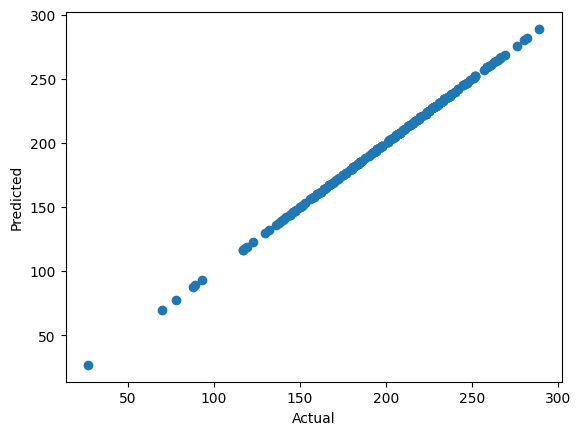

In [116]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

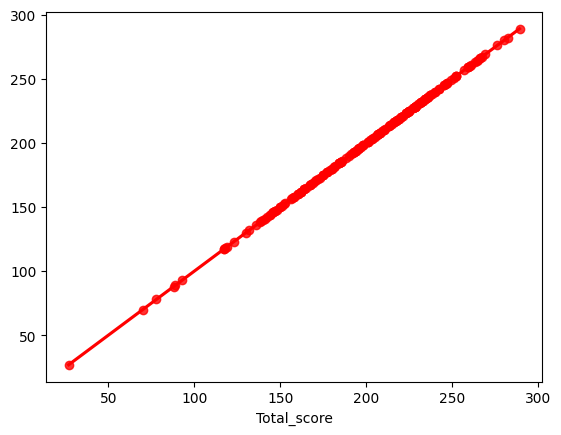

In [117]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');